In [7]:
# import required packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
# load data 
data = pd.read_csv('usa_housing_price.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size,Price
0,79545.45857,5.317139,7.009188,23086.80050,188.214212,1.059034e+06
1,79248.64245,4.997100,6.730821,40173.07217,160.042526,1.505891e+06
2,61287.06718,5.134110,8.512727,36882.15940,227.273545,1.058988e+06
3,63345.24005,3.811764,5.586729,34310.24283,164.816630,1.260617e+06
4,59982.19723,5.959445,7.839388,26354.10947,161.966659,6.309435e+05


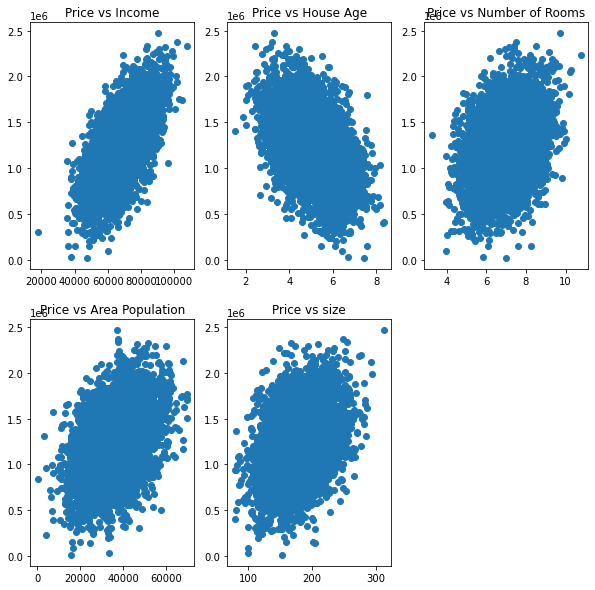

In [5]:
# visualize the data 
fig = plt.figure(figsize = (10, 10))

fig1 = plt.subplot(231)
plt.scatter(data.loc[:, 'Avg. Area Income'], data.loc[:, 'Price'])
plt.title('Price vs Income')

fig2 = plt.subplot(232)
plt.scatter(data.loc[:, 'Avg. Area House Age'], data.loc[:, 'Price'])
plt.title('Price vs House Age')

fig3 = plt.subplot(233)
plt.scatter(data.loc[:, 'Avg. Area Number of Rooms'], data.loc[:, 'Price'])
plt.title('Price vs Number of Rooms')

fig4 = plt.subplot(234)
plt.scatter(data.loc[:, 'Area Population'], data.loc[:, 'Price'])
plt.title('Price vs Area Population')

fig5 = plt.subplot(235)
plt.scatter(data.loc[:, 'size'], data.loc[:, 'Price'])
plt.title('Price vs size')

plt.show()

In [6]:
# define X and y 
X = data.loc[:,'size']
y = data.loc[:,'Price']

In [10]:
# reshape X and y (required shape for linear regression model)
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [11]:
# set up linear regression model
LR1 = LinearRegression()

In [12]:
# train the model 
LR1.fit(X,y)

LinearRegression()

In [15]:
# make a prediction 
y_predict_1 = LR1.predict(X)

In [16]:
# evaluate the model with mean squared error and r2 score
MSE = mean_squared_error(y, y_predict_1)
r2 = r2_score(y, y_predict_1)
print(MSE, r2)

108771672553.6264 0.1275031240418234


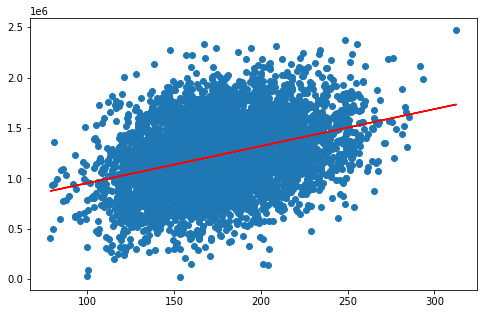

In [17]:
# visualize the linear prediction function with the original data
fig6 = plt.figure(figsize = (8,5))
plt.scatter(X, y)
plt.plot(X, y_predict_1, 'r')
plt.show()

In [18]:
# define X_multi (multiple factors)
X_multi = data.drop(['Price'], axis=1)

In [19]:
# set up second linear regression model
LR_multi = LinearRegression()

In [20]:
# train the second linear regression model with mutliple factors
LR_multi.fit(X_multi, y)

LinearRegression()

In [21]:
# make a prediction with the second model
y_predict_multi = LR_multi.predict(X_multi)

In [22]:
# evaluate the second model with mean squared error and r2 score
MSE_multi = mean_squared_error(y,y_predict_multi)
r2 = r2_score(y,y_predict_multi)
print(MSE_multi,r2)

10219846512.17786 0.9180229195220739


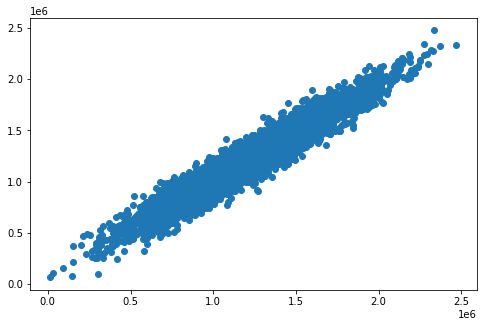

In [23]:
# visualize the predicted data
fig7 = plt.figure(figsize = (8, 5))
plt.scatter(y, y_predict_multi)
plt.show()

In [25]:
# make a prediction on a random testing data (65000, 5, 5, 30000, 200)
X_test = np.array([65000,5,5,30000,200]).reshape(1,-1)
y_test_predict = LR_multi.predict(X_test)
print(y_test_predict)

[[817052.19516298]]
